# **Setup**

**Dataset**
* https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
* https://www.kaggle.com/datasets/aadharshviswanath/aircraft-sensor-and-engine-performance

**NASA**
* https://www.nasa.gov/intelligent-systems-division/
* https://ieee-dataport.org/documents/nasa-turbofan-jet-engine-data-set
* https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data

In [50]:
!python --version

from psutil import *
print(f'CPU Cores: {cpu_count()}')
print(f'System Memory: {virtual_memory()[0]/(1024**3)} GB')

Python 3.11.8
CPU Cores: 16
System Memory: 15.692092895507812 GB


In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import os 
from zipfile import ZipFile
from IPython.display import clear_output

In [28]:
Folder_Input = 'Input Data'
Folder_Output = 'Output Data'

Folder_List = [Folder_Input, Folder_Output]

for Folder in Folder_List:
    os.makedirs(Folder, exist_ok=True)

# **Data Import**

## **Download & Extract**

In [29]:
os.chdir(Folder_Input)
# !kaggle datasets download -d aadharshviswanath/aircraft-sensor-and-engine-performance --unzip
!kaggle datasets download -d behrad3d/nasa-cmaps --unzip
os.chdir('..')

nasa-cmaps.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
os.getcwd()

'c:\\Users\\aksha\\OneDrive\\06 Data Science & Analytics\\Github\\Machine-Learning\\13 NASA Aircraft Jet Engine Sensor Data'

## **Sensor Description**
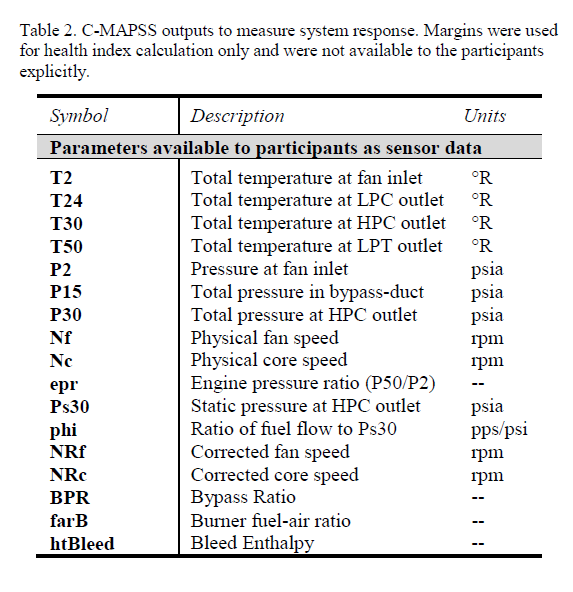
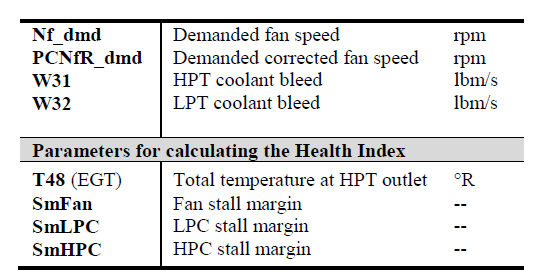

In [31]:
Sensor_Names = ['unit','cycle','set01','set02','set03',
           'T2','T24','T30','T50', # Temperature Fan Inlet, LPC Outlet, HPC Outlet, LPT Outlet
           'P2','P15','P30', # Pressure Fan Inlet, In By-Pass Duct, HPC Outlet
           'Nf','Nc', # Actual Fan & Core Speed
           'epr','Ps30','phi',
           'NRf','NRc', # Corrected Fan & Core Speed
           'BPR','farB','htBleed', # By-Pass-Ratio, Burner Fuel-Air Ratio, Bleed Enthalpy
           'Nf_dmd','PCNfR_dmd', # Demand
           'W31','W32']

print(len(Sensor_Names))

26


## **FD001 Train Data**

In [32]:
FD001_Train = pd.read_csv(f'{Folder_Input}/CMaps/train_FD001.txt',header=None,sep=' ',index_col=False,
                          names=Sensor_Names)

print(FD001_Train.shape)
print(FD001_Train.columns)
FD001_Train.head()

(20631, 26)
Index(['unit', 'cycle', 'set01', 'set02', 'set03', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')


C:\Users\aksha\AppData\Local\Temp\ipykernel_23472\87959044.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  FD001_Train = pd.read_csv(f'{Folder_Input}/CMaps/train_FD001.txt',header=None,sep=' ',index_col=False,


,unit,cycle,set01,set02,set03,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


## **FD001 Test Data**

In [34]:
FD001_Test = pd.read_csv(f'{Folder_Input}/CMaps/test_FD001.txt',header=None,sep=' ',index_col=False,
                         names=Sensor_Names)

print(FD001_Test.shape)
print(FD001_Test.columns)
FD001_Test.head()

(13096, 26)
Index(['unit', 'cycle', 'set01', 'set02', 'set03', 'T2', 'T24', 'T30', 'T50',
       'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRc',
       'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'],
      dtype='object')


C:\Users\aksha\AppData\Local\Temp\ipykernel_23472\3080208542.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  FD001_Test = pd.read_csv(f'{Folder_Input}/CMaps/test_FD001.txt',header=None,sep=' ',index_col=False,


,unit,cycle,set01,set02,set03,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


## **FD001 RUL Data**

In [35]:
FD001_RUL = pd.read_csv(f'{Folder_Input}/CMaps/RUL_FD001.txt',header=None,index_col=False)

print(FD001_RUL.shape)
print(FD001_RUL.columns)
FD001_RUL.head()

(100, 1)
Index([0], dtype='int64')


,0
0,112
1,98
2,69
3,82
4,91


# **Data Validation**

## **Train Data**

In [36]:
FD001_Train.isna().sum()

unit         0
cycle        0
set01        0
set02        0
set03        0
T2           0
T24          0
T30          0
T50          0
P2           0
P15          0
P30          0
Nf           0
Nc           0
epr          0
Ps30         0
phi          0
NRf          0
NRc          0
BPR          0
farB         0
htBleed      0
Nf_dmd       0
PCNfR_dmd    0
W31          0
W32          0
dtype: int64

In [37]:
FD001_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit       20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   set01      20631 non-null  float64
 3   set02      20631 non-null  float64
 4   set03      20631 non-null  float64
 5   T2         20631 non-null  float64
 6   T24        20631 non-null  float64
 7   T30        20631 non-null  float64
 8   T50        20631 non-null  float64
 9   P2         20631 non-null  float64
 10  P15        20631 non-null  float64
 11  P30        20631 non-null  float64
 12  Nf         20631 non-null  float64
 13  Nc         20631 non-null  float64
 14  epr        20631 non-null  float64
 15  Ps30       20631 non-null  float64
 16  phi        20631 non-null  float64
 17  NRf        20631 non-null  float64
 18  NRc        20631 non-null  float64
 19  BPR        20631 non-null  float64
 20  farB  

In [38]:
FD001_Train.describe()

,unit,cycle,set01,set02,set03,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [33]:
FD001_Train['unit'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

# **Data Exploration**

In [40]:
FD001_Train.groupby('unit')['cycle'].max()

unit
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle, Length: 100, dtype: int64

## **Unit 001 Data**

In [42]:
FD001_Train_Unit001 = FD001_Train[FD001_Train['unit']==1]
FD001_Train_Unit001

,unit,cycle,set01,set02,set03,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [48]:
FD001_Train_Unit001.var().to_frame(name='Feature_Variance').reset_index().sort_values('Feature_Variance', ascending=False)

,index,Feature_Variance
1,cycle,3.088000e+03
8,T50,7.336967e+01
7,T30,3.317501e+01
18,NRc,3.094840e+01
13,Nc,2.412630e+01
21,htBleed,2.177574e+00
11,P30,8.288536e-01
16,phi,5.612651e-01
6,T24,2.369696e-01
15,Ps30,7.200959e-02


## **Correlation Heatmap**

<Axes: >

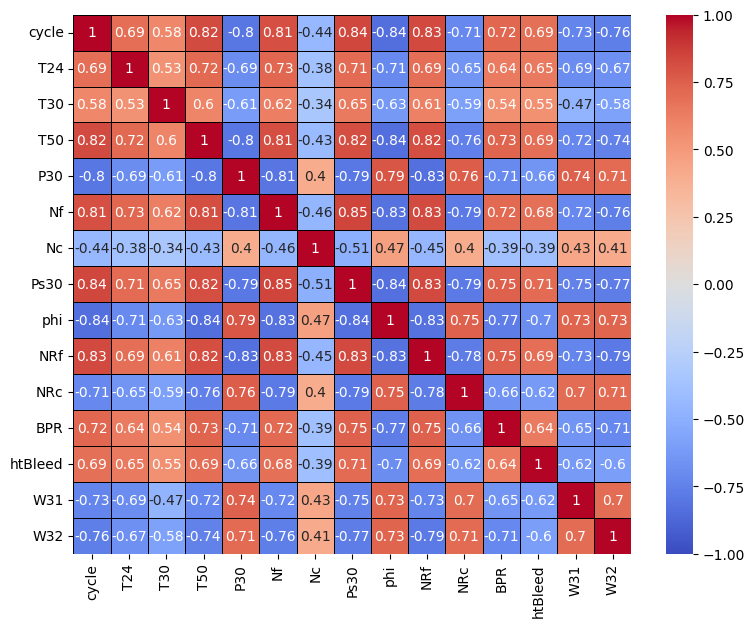

In [169]:
FD001_Train_Unit001_Feature_Drop = ['unit','set01','set02','set03','T2','P2','P15',
                                    'epr','farB','Nf_dmd','PCNfR_dmd']

plt.figure(figsize=(9,7))
sns.heatmap(FD001_Train_Unit001.drop(FD001_Train_Unit001_Feature_Drop,axis=1).corr(),
            annot=True,cbar=True,vmin=-1,vmax=1,cmap='coolwarm',
            linewidths=0.5,linecolor='black',fmt='.2g')

## **Temperature Data**

### **Object Based Method**

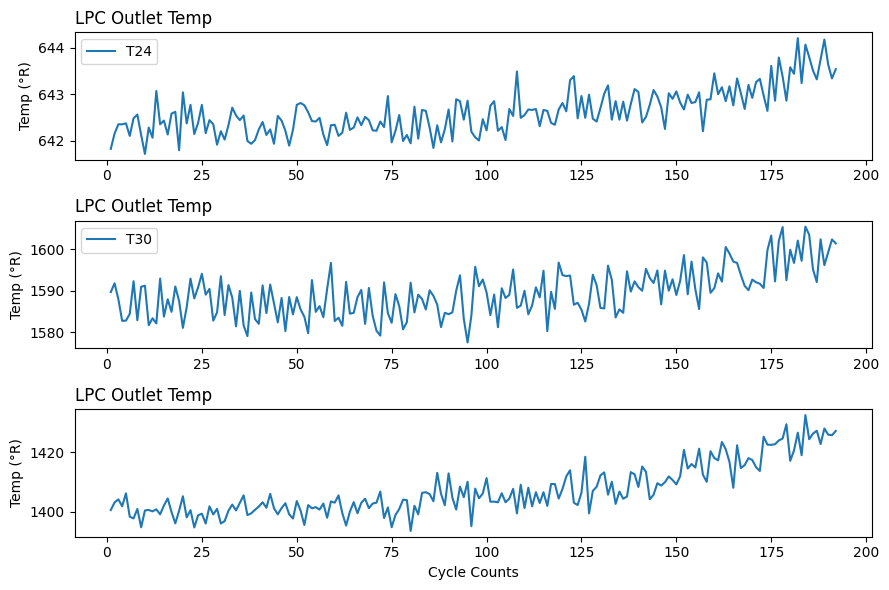

In [183]:
fig, axs = plt.subplots(3,1,figsize=(9,6))

axs[0].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T24'],label='T24')
axs[0].set_title('LPC Outlet Temp',loc='left')
axs[0].set_ylabel('Temp (°R)')
axs[0].legend()

axs[1].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T30'],label='T30')
axs[1].set_title('LPC Outlet Temp',loc='left')
axs[1].set_ylabel('Temp (°R)')
axs[1].legend()

axs[2].plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T50'],label='T50')
axs[2].set_title('LPC Outlet Temp',loc='left')
axs[2].set_xlabel('Cycle Counts')
axs[2].set_ylabel('Temp (°R)')
axs[0].legend()

plt.tight_layout()
plt.show()

### **State Based Method**

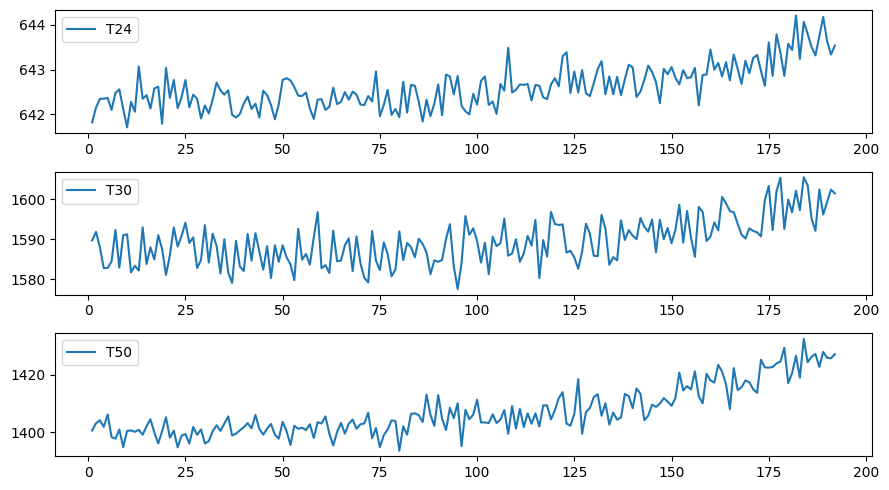

In [138]:
plt.figure(figsize=(9,5))

plt.subplot(3,1,1)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T24'],label='T24')
plt.legend()

plt.subplot(3,1,2)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T30'],label='T30')
# plt.title('T30 Sensor')
plt.legend()

plt.subplot(3,1,3)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['T50'],label='T50')
plt.legend()

plt.tight_layout()

## **Presure Data**

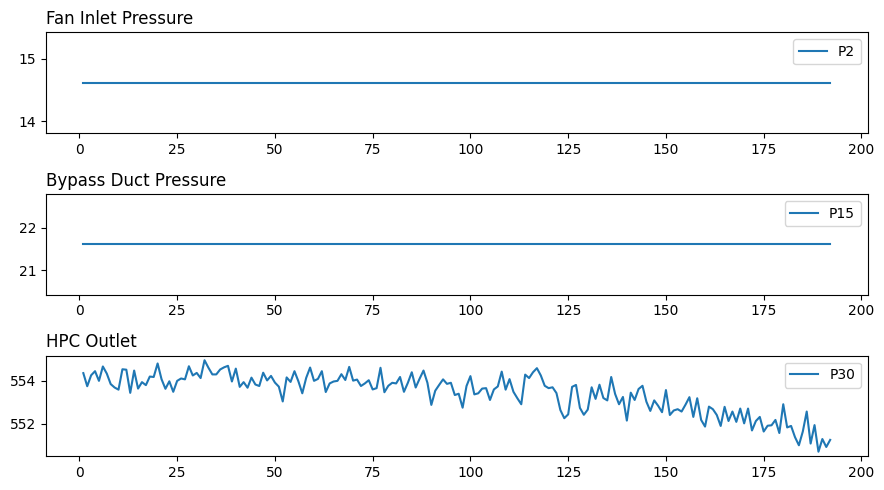

In [149]:
plt.figure(figsize=(9,5))

plt.subplot(3,1,1)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['P2'],label='P2')
plt.title('Fan Inlet Pressure',loc='left')
plt.legend()

plt.subplot(3,1,2)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['P15'],label='P15')
plt.title('Bypass Duct Pressure',loc='left')
plt.legend()

plt.subplot(3,1,3)
plt.plot(FD001_Train_Unit001['cycle'],FD001_Train_Unit001['P30'],label='P30')
plt.title('HPC Outlet',loc='left')
plt.legend()

plt.tight_layout()

## **RPM Data**